In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data_dir = 'data/raw/'
file_path = os.path.join(data_dir, 'porto_seguro_safe_driver_prediction.csv')

print(f"Lade Datensatz von lokaler Datei: {file_path}")
try:
    df = pd.read_csv(file_path)
    print("Datensatz erfolgreich geladen.")
except FileNotFoundError:
    print(f"Fehler: Die Datei '{file_path}' wurde nicht gefunden.")
    df = None

if df is not None:
    # Überprüfen der Datentypen und fehlenden Werte
    print("\nInformationen zum Datensatz:")
    df.info()

Lade Datensatz von lokaler Datei: data/raw/porto_seguro_safe_driver_prediction.csv
Datensatz erfolgreich geladen.

Informationen zum Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  float64
 2   ps_ind_02_cat   594996 non-null  float64
 3   ps_ind_03       595212 non-null  float64
 4   ps_ind_04_cat   595129 non-null  float64
 5   ps_ind_05_cat   589403 non-null  float64
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_i

In [21]:
# Zeige die ersten 5 Zeilen des Datensatzes
print("Erste 5 Zeilen des Datensatzes:")
print(df.head())

# Gib die Dimensionen (Anzahl der Zeilen und Spalten) aus
print("\nDimensionen des Datensatzes:", df.shape)

# Gib die Datentypen und die Anzahl der nicht-fehlenden Werte pro Spalte aus
print("\nInformationen zum Datensatz (Datentypen, nicht-fehlende Werte):")
df.info()

Erste 5 Zeilen des Datensatzes:
   target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0       0        2.0            2.0        5.0            1.0            0.0   
1       0        1.0            1.0        7.0            0.0            0.0   
2       0        5.0            4.0        9.0            1.0            0.0   
3       0        0.0            1.0        2.0            0.0            0.0   
4       0        0.0            2.0        0.0            1.0            0.0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
0              0              1              0              0  ...   
1              0              0              1              0  ...   
2              0              0              1              0  ...   
3              1              0              0              0  ...   
4              1              0              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin 

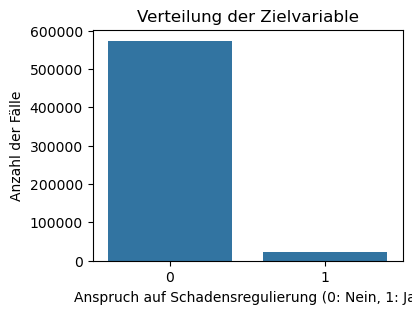

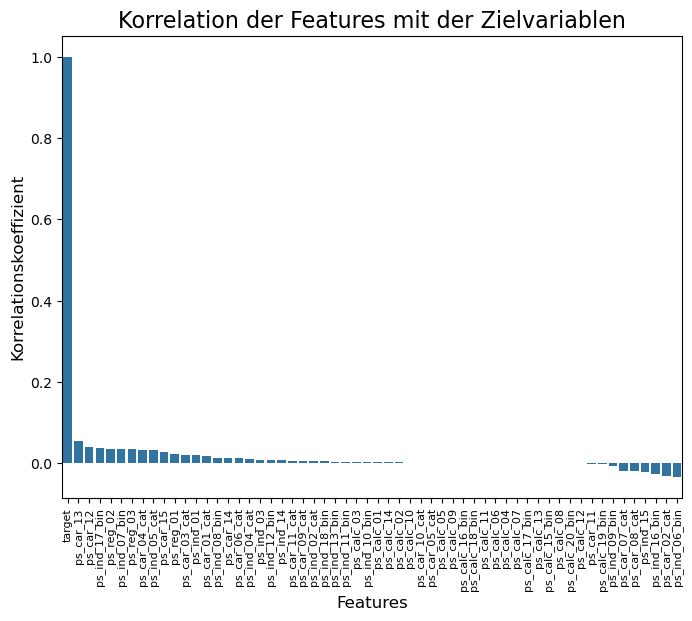

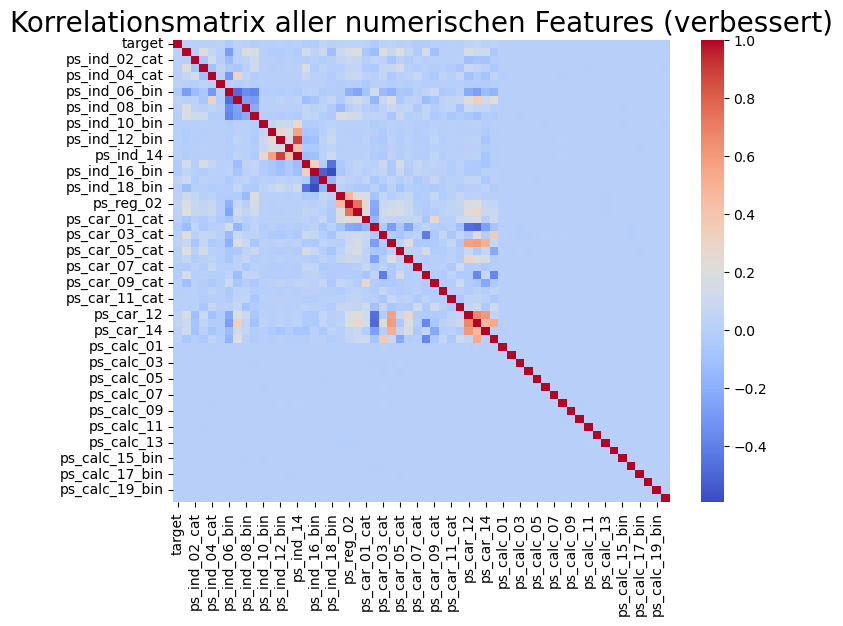


Anzahl der fehlenden Werte pro Spalte:

Anzahl und prozentualer Anteil der fehlenden Werte pro Spalte:
                Total  Percentage
ps_car_03_cat  411231   69.089837
ps_car_05_cat  266551   44.782531
ps_reg_03      107772   18.106490
ps_car_14       42620    7.160474
ps_car_07_cat   11489    1.930237
ps_ind_05_cat    5809    0.975955
ps_car_09_cat     569    0.095596
ps_ind_02_cat     216    0.036290
ps_car_01_cat     107    0.017977
ps_ind_04_cat      83    0.013945
ps_car_02_cat       5    0.000840
ps_car_11           5    0.000840
ps_car_12           1    0.000168


In [27]:
# Visualisierung der Verteilung der Zielvariable 'target'
plt.figure(figsize=(4, 3))
sns.countplot(x='target', data=df)
plt.title('Verteilung der Zielvariable')
plt.xlabel('Anspruch auf Schadensregulierung (0: Nein, 1: Ja)')
plt.ylabel('Anzahl der Fälle')
plt.show()

# Erster Schritt der Korrelationsanalyse
correlation_with_target = df.select_dtypes(include=np.number).corr()['target'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Korrelation der Features mit der Zielvariablen', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Korrelationskoeffizient', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.show()

plt.figure(figsize=(8, 6))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix aller numerischen Features (verbessert)', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Überprüfung auf fehlende Werte
print("\nAnzahl der fehlenden Werte pro Spalte:")
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Total': missing_values, 'Percentage': missing_values_percentage})
missing_df = missing_df[missing_df['Total'] > 0].sort_values(by='Total', ascending=False)
print("\nAnzahl und prozentualer Anteil der fehlenden Werte pro Spalte:")
print(missing_df)


Anzahl der fehlenden Werte pro Spalte:
ps_car_03_cat    411231
ps_car_05_cat    266551
ps_reg_03        107772
ps_car_14         42620
ps_car_07_cat     11489
ps_ind_05_cat      5809
ps_car_09_cat       569
ps_ind_02_cat       216
ps_car_01_cat       107
ps_ind_04_cat        83
ps_car_02_cat         5
ps_car_11             5
ps_car_12             1
dtype: int64


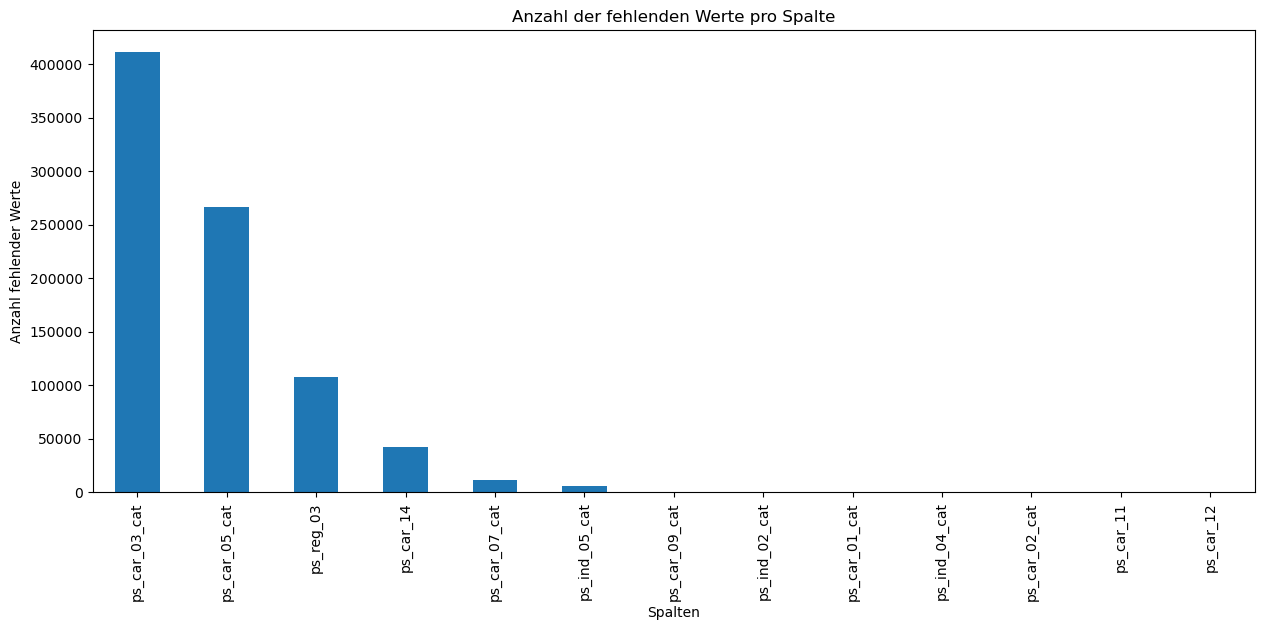

In [28]:
# Prüfe den Datensatz auf fehlende Werte
print("\nAnzahl der fehlenden Werte pro Spalte:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

# Visualisiere die fehlenden Werte
if not missing_values.empty:
    plt.figure(figsize=(15, 6))
    missing_values.plot.bar()
    plt.title('Anzahl der fehlenden Werte pro Spalte')
    plt.xlabel('Spalten')
    plt.ylabel('Anzahl fehlender Werte')
    plt.show()
else:
    print("Keine fehlenden Werte im Datensatz gefunden.")